[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8698330361484844

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.84      0.67       956
           1       0.97      0.87      0.92      5213

    accuracy                           0.87      6169
   macro avg       0.76      0.86      0.79      6169
weighted avg       0.90      0.87      0.88      6169



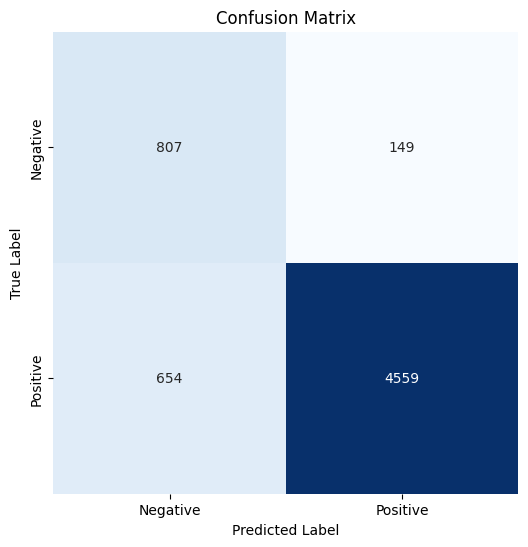

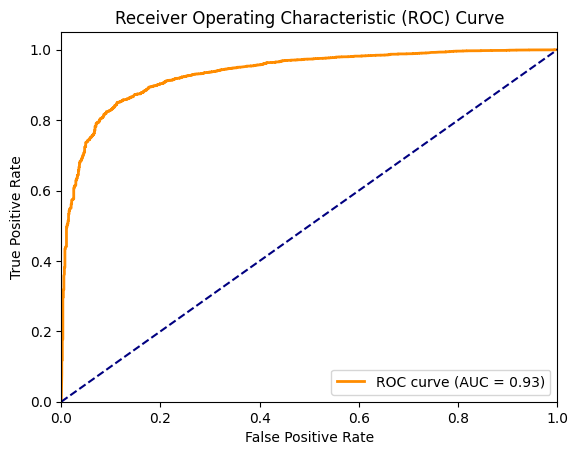

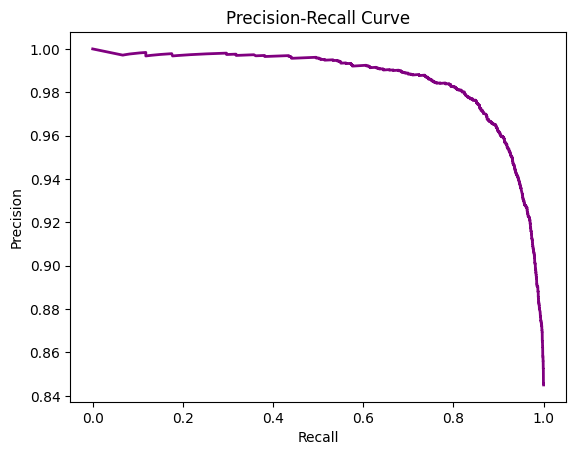

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK data for stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the Amazon product reviews dataset
data = pd.read_csv("Amazon-Product-Reviews.csv")

# data.head()

# Drop rows where 'review_body' or 'sentiment' is NaN
data.dropna(subset=['review_body', 'sentiment'], inplace=True)

# Basic text cleaning function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the preprocessing function to the review text
data['cleaned_review'] = data['review_body'].apply(preprocess_text)


# Define the feature (X) and target (y) variables
x = data['cleaned_review']
y = data['sentiment']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF feature vectors
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)


# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=1, class_weight='balanced')  # Linear kernel works well for text data
svm_model.fit(x_train_tfidf, y_train)


# Predict on the test set
y_pred = svm_model.predict(x_test_tfidf)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
